In [2]:
import sys
sys.path.append('../')

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
import numpy as np
from importlib import reload
import libs.analysis as analysis
import libs.cnn_model as cnn_model

In [46]:
# reloads 
reload(cnn_model)

<module 'libs.cnn_model' from '../libs/cnn_model.py'>

In [4]:
# Parameters
batch_size = 128
epochs = 6
num_classes = 10

img_rows, img_cols = (28, 28)

# Model Destination
model_dest_file = 'mnist_cnn_model.h5'

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_val = x_train[58000:]
y_val = y_train[58000:]

x_train = x_train[:58000]
y_train = y_train[:58000]

# Train / Test / Validation Split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)


(58000, 28, 28)
(58000,)
(10000, 28, 28)
(10000,)
(2000, 28, 28)
(2000,)


In [7]:
# Data normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_test /= 255
x_val /= 255

In [8]:
# reshape the data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(58000, 28, 28, 1)
(10000, 28, 28, 1)
(2000, 28, 28, 1)


In [9]:
# Convert classes to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [10]:
# if we're loading a model load it!
model = load_model(model_dest_file)

In [50]:
model = cnn_model.build_cnn_model(num_classes, input_shape=(28,28,1), layer2=False)

In [51]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [52]:
# Fit i.e. train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                      verbose=1, validation_data=(x_test, y_test))

Train on 58000 samples, validate on 10000 samples
Epoch 1/6
58000/58000 [==============================] - 499s 9ms/step - loss: 0.2035 - acc: 0.9369 - val_loss: 0.0596 - val_acc: 0.9813
Epoch 2/6
58000/58000 [==============================] - 555s 10ms/step - loss: 0.0616 - acc: 0.9811 - val_loss: 0.0386 - val_acc: 0.9863
Epoch 3/6
58000/58000 [==============================] - 605s 10ms/step - loss: 0.0459 - acc: 0.9860 - val_loss: 0.0281 - val_acc: 0.9898
Epoch 4/6
58000/58000 [==============================] - 621s 11ms/step - loss: 0.0350 - acc: 0.9888 - val_loss: 0.0221 - val_acc: 0.9925
Epoch 5/6
58000/58000 [==============================] - 578s 10ms/step - loss: 0.0295 - acc: 0.9909 - val_loss: 0.0267 - val_acc: 0.9903
Epoch 6/6
58000/58000 [==============================] - 575s 10ms/step - loss: 0.0268 - acc: 0.9917 - val_loss: 0.0230 - val_acc: 0.9929


In [53]:
# Save the model data
model.save(model_dest_file)

In [12]:
# Now Let's evaluate the model
score = model.evaluate(x_val, y_val, verbose=1)

2000/2000 [==============================] - 6s 3ms/step


In [13]:
# View the Final Loss and Accuracy scores across all epochs
analysis.print_loss_and_accuracy_from_score(score)

Test loss: 0.03757795509165044
Test accuracy: 0.9935


In [14]:
# View the Loss and Accuracy curves across the epochs
analysis.plot_loss_and_accuracy_curves(history, save=False)

NameError: name 'history' is not defined

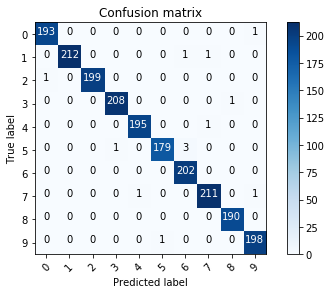

In [16]:
y_pred = model.predict(x_val)
analysis.plot_confusion_matrix(y_val, y_pred, classes=range(10), save=False)

In [25]:
reload(analysis)
scores = analysis.get_scores_oh(y_val, y_pred)
analysis.print_scores(scores)

Precision (specificity): 99.354%
Recall (sensitivity): 99.343%
Accuracy: 99.350%
F1: 99.346%
